Put netcdf files of the same case to folder so that they can be read in together.
And plot some slices.

In [4]:
import xarray as xr
from matplotlib import pyplot as plt
plt.style.use('./grl.mplstyle')
import os
os.environ['PATH'] = os.environ['PATH'] + ':/Library/TeX/texbin/'
import numpy as np
import xrft
from dask.diagnostics import ProgressBar

In [2]:
# Read in
DIR = '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/'

def open (label):
    tlist = np.array([110,130,150,170])
    filelist = [DIR + label + f'/field{t}.nc' for t in tlist]
    ds = xr.open_mfdataset(filelist, concat_dim='t', combine='nested')
    ds = ds.assign_coords(t=tlist)
    return ds

ds1 = open('C4')
ds2 = open('C4_NL30')
ds3 = open('C4_NL45')

In [3]:
from mlpython.utils import compute_diss
# ds1 = compute_diss(ds1).compute()
# ds2 = compute_diss(ds2).compute()
# ds3 = compute_diss(ds3).compute()

In [10]:
ds1.isel(t=3)

<xarray.Dataset>
Dimensions:  (zl: 15, x: 1024, y: 1024, x_g: 1024, y_g: 1024, zl_g: 15)
Coordinates:
  * x        (x) float64 -99.9 -99.71 -99.51 -99.32 ... 99.32 99.51 99.71 99.9
  * x_g      (x_g) float64 -100.0 -99.8 -99.61 -99.41 ... 99.22 99.41 99.61 99.8
  * y        (y) float64 -99.9 -99.71 -99.51 -99.32 ... 99.32 99.51 99.71 99.9
  * y_g      (y_g) float64 -100.0 -99.8 -99.61 -99.41 ... 99.22 99.41 99.61 99.8
  * zl       (zl) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * zl_g     (zl_g) float64 -0.5 0.5 1.5 2.5 3.5 4.5 ... 9.5 10.5 11.5 12.5 13.5
    z        (zl, x, y) float64 dask.array<chunksize=(15, 1024, 1024), meta=np.ndarray>
    z_g      (zl_g, x, y) float64 dask.array<chunksize=(15, 1024, 1024), meta=np.ndarray>
    t        int64 170
Data variables:
    h        (zl, x, y) float32 dask.array<chunksize=(15, 1024, 1024), meta=np.ndarray>
    ux       (zl, x, y) float32 dask.array<chunksize=(15, 1024, 1024), meta=np.ndarray>
    uy       (zl, x, y) float32 dask.array<chunksize=(15, 1024, 1024), meta=np.ndarray>
    uz       (zl, x, y) float32 dask.array<chunksize=(15, 1024, 1024), meta=np.ndarray>
Attributes:
    sourcepath:  /projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_...
    L:           200
    P:           0.02
    Re:          40000
    LEVEL:       10
    NL:          15
    rand:        2
    Htheta:      0.503
    H:           40.0
    label:       C4

### Plot slices

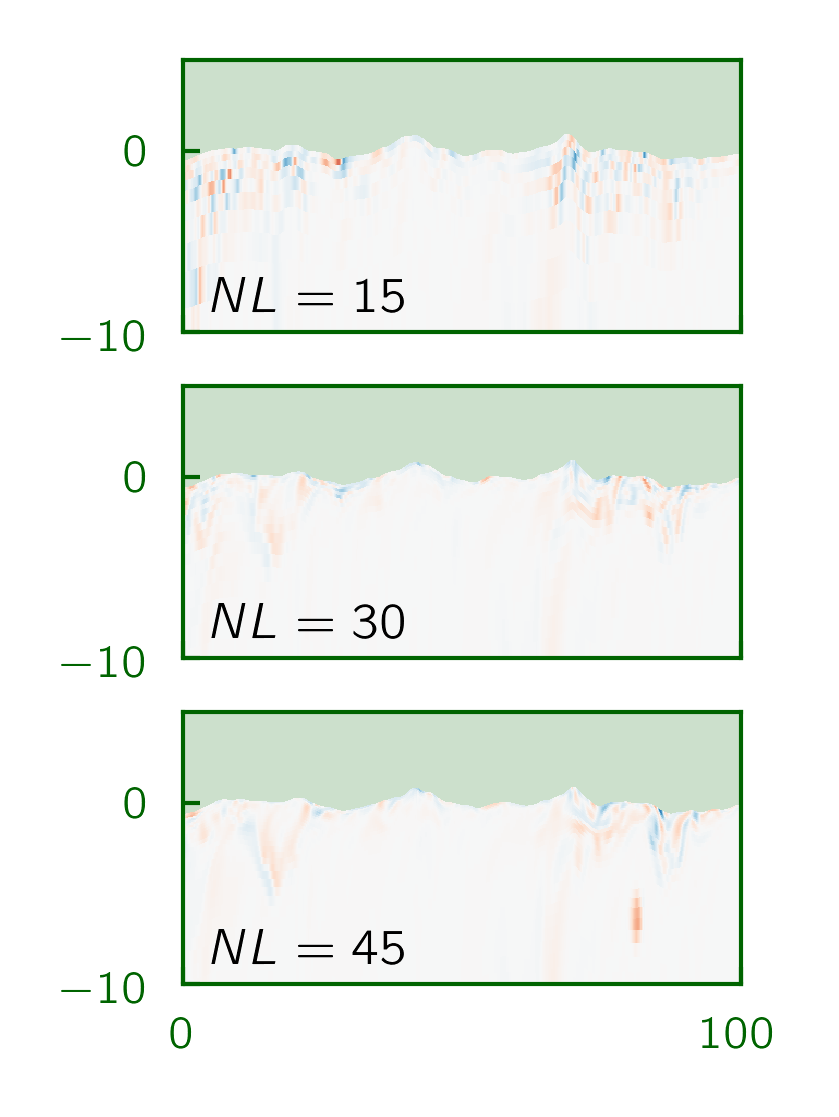

In [18]:
fig, axes = plt.subplots (3, 1, figsize=[1.2,2], sharex=True); ax = plt.gca()

c = 'darkgreen'

t = 150
NLs = [15, 30, 45]
for i, ds in enumerate((ds1,ds2,ds3)): 
    with ProgressBar():
        vort2d = compute_diss(ds.isel(t=3)).omegazp.sel(y=0, method='nearest')
    vort2d.plot(ax=axes[i], y='z', xlim=[0,100], ylim=[-10,5], cmap='RdBu_r',
                vmax=0.4, vmin=-0.4, add_colorbar=False) # cbar_kwargs={'label':r'$\omega_x$'}
    axes[i].set_yticks([-10,0]); axes[i].set_xticks([0, 100])
    axes[i].set(xlabel=None, ylabel=None, title=None)
    axes[i].spines['bottom'].set_color(c)
    axes[i].spines['top'].set_color(c)
    axes[i].spines['right'].set_color(c)
    axes[i].spines['left'].set_color(c)
    axes[i].annotate(r'$NL=%g$' %NLs[i], (5,-9), fontsize=6)   
    axes[i].set_facecolor('darkgreen')
    axes[i].patch.set_alpha(0.2)

axes[0].tick_params(axis='both', colors=c)
axes[1].tick_params(axis='both', colors=c)
axes[2].tick_params(axis='both', colors=c)

# plt.savefig('../figures/multilayer-diss/vort_side_' + ds.caselabel + '.tiff', bbox_inches='tight')


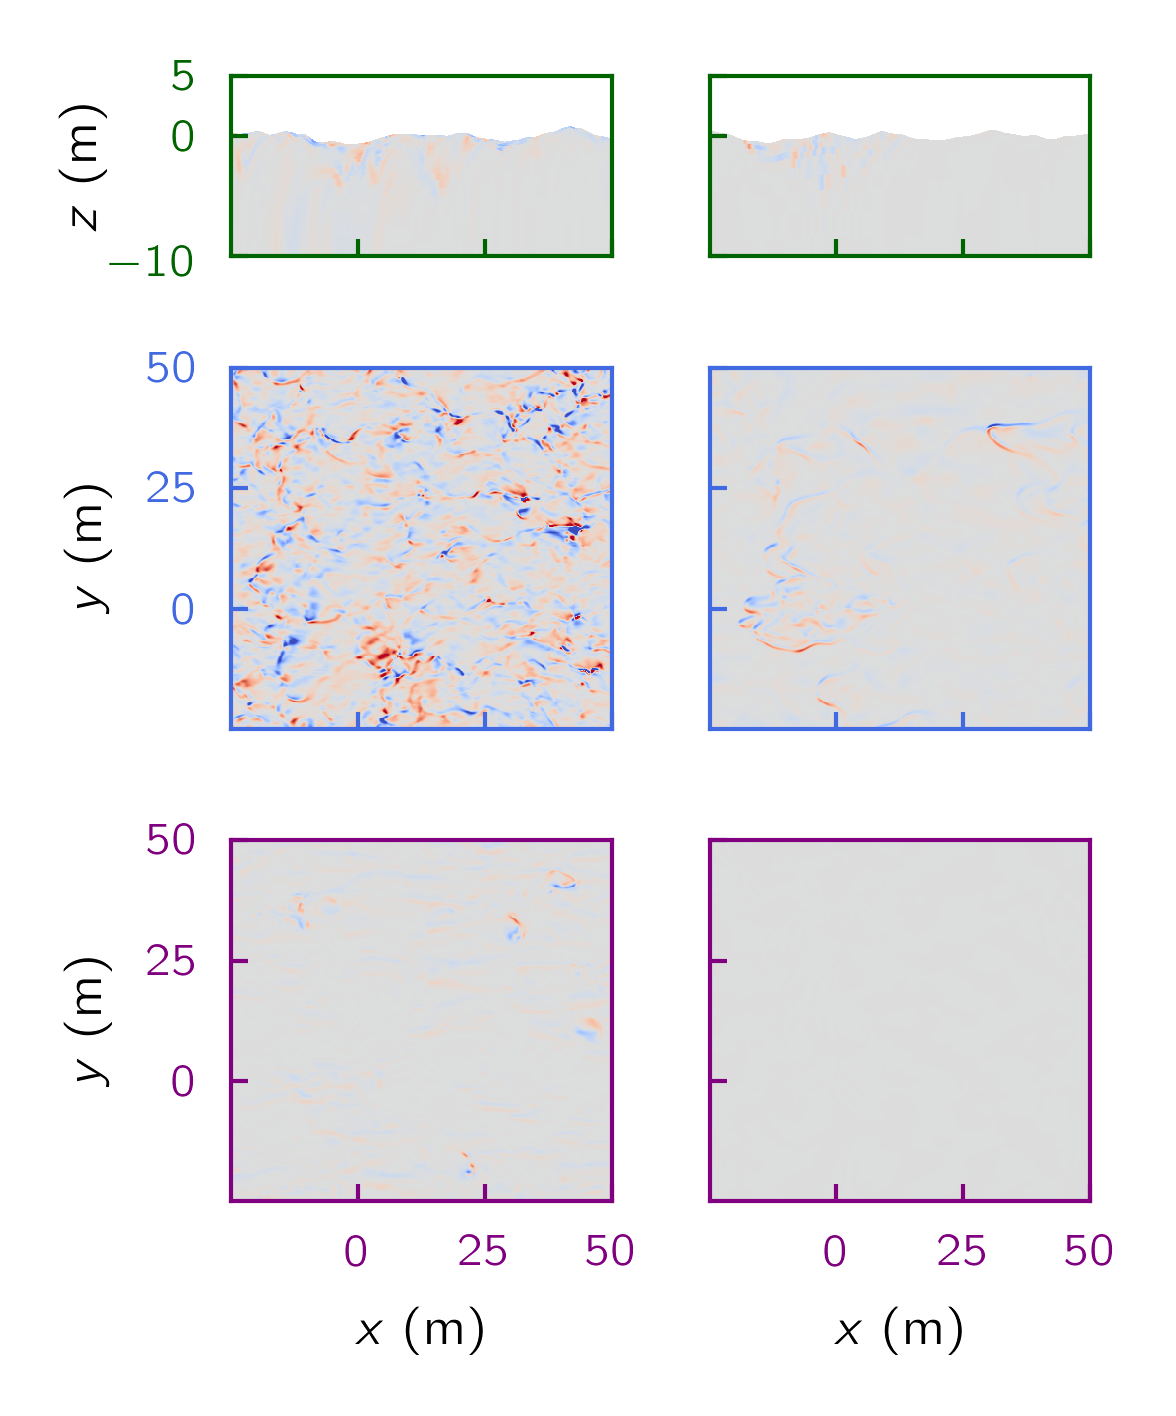

In [67]:
fig, axes = plt.subplots (3, 2, figsize=[2,2.4], gridspec_kw={'height_ratios': [1,2,2]}, 
                          sharex=True, sharey=False); 
ax = plt.gca()
# fig.patch.set_facecolor('lightgrey')
# fig.patch.set_alpha(1)

def color_spine(ax, c):
    ax.spines['bottom'].set_color(c)
    ax.spines['top'].set_color(c)
    ax.spines['right'].set_color(c)
    ax.spines['left'].set_color(c)
    ax.tick_params(axis='both', colors=c)
    # ax.set_facecolor(c)
    # ax.patch.set_alpha(0.2)

for ax in (axes[0,0], axes[0,1]):
    color_spine(ax, 'darkgreen')
for ax in (axes[1,0], axes[1,1]):
    color_spine(ax, 'royalblue')
for ax in (axes[2,0], axes[2,1]):
    color_spine(ax, 'purple')   

def plot(vort, LAYER1, LAYER2, axes, range1=-25, range2=25):
    ax = axes[0]
    vort.sel(y=(range1+range2)/2, method='nearest').plot(ax=ax, x='x', y='z', xlim=[0,50], ylim=[-10,5], cmap='coolwarm',
             vmax=0.3, vmin=-0.3, add_colorbar=False) # cbar_kwargs={'label':r'$\omega_x$'}
    ax.set(xlabel=None, ylabel=None, title=None)
    ax.set_xlim([range1,range2]); ax.set_ylim([-10,5]) 
    # ax.annotate(r'$NL=%g$' %NLs[i], (5,-9), fontsize=6)   

    ax = axes[1]
    vort.sel(zl=LAYER1).plot(ax=ax, x='x', vmax=0.3, vmin=-0.3, cmap='coolwarm', 
                             add_colorbar=False, xincrease=True, yincrease=True) # cbar_kwargs={'label':r'$\omega_x$'}
    ax.set(xlabel=None, ylabel=None, title=None)
    ax.set_xlim([range1,range2]); ax.set_ylim([range1,range2])

    ax = axes[2]
    vort.sel(zl=LAYER2).plot(ax=ax, x='x', vmax=0.3, vmin=-0.3, cmap='coolwarm', 
                             add_colorbar=False, xincrease=True, yincrease=True)
    ax.set(xlabel=None, ylabel=None, title=None)
    ax.set_xlim([range1,range2]); ax.set_ylim([range1,range2]) 

ds1 = open('C4_NL30')
vort = compute_diss(ds1.isel(t=3)).omegazp.compute()
depth = -7
LAYER1 = ds1.attrs['NL'] - 1
LAYER2 = np.abs(ds1.z.mean(dim=['x','y','t']).values - depth).argmin()
plot(vort, LAYER1, LAYER2, [axes[0,0],axes[1,0],axes[2,0]])

ds2 = open('C1')
vort = compute_diss(ds2.isel(t=3)).omegazp.compute()
depth = -7
LAYER1 = ds2.attrs['NL'] - 1
LAYER2 = np.abs(ds2.z.mean(dim=['x','y','t']).values - depth).argmin()
plot(vort, LAYER1, LAYER2, [axes[0,1],axes[1,1],axes[2,1]])

axes[0,0].set_yticks([-10,0,5])
axes[1,0].set_yticks([0,25,50])
axes[2,0].set_yticks([0,25,50])
axes[0,1].set_yticks([-10,0,5]); axes[0,1].set_yticklabels([])
axes[1,1].set_yticks([0,25,50]); axes[1,1].set_yticklabels([])
axes[2,1].set_yticks([0,25,50]); axes[2,1].set_yticklabels([])
axes[2,0].set_xticks([0,25,50])
axes[2,1].set_xticks([0,25,50])

axes[2,0].set_xlabel('$x$ (m)', fontsize=6)
axes[2,1].set_xlabel('$x$ (m)', fontsize=6)
axes[0,0].set_ylabel('$z$ (m)', fontsize=6, labelpad=0)
axes[1,0].set_ylabel('$y$ (m)', fontsize=6)
axes[2,0].set_ylabel('$y$ (m)', fontsize=6)

plt.tight_layout()
plt.savefig('/Users/jiarongw/Work/Multilayer dissipation/figures_raw/multilayer-diss/vort_side.tiff', bbox_inches='tight')

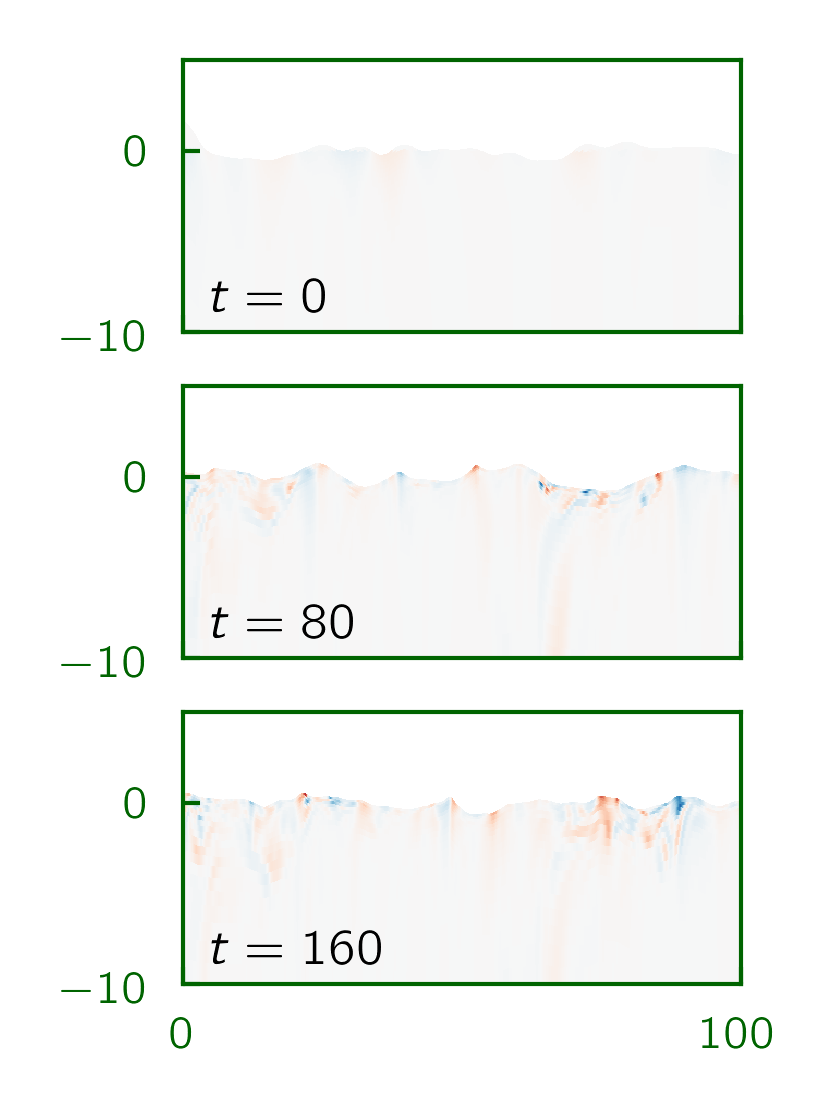

In [4]:
fig, axes = plt.subplots (3, 1, figsize=[1.2,2], sharex=True); ax = plt.gca()
c = 'darkgreen'
for i,t in enumerate((0,80,160)):    
    vort2d = ds.omegaz.sel(y=0, t=t, method='nearest')
    vort2d.plot(ax=axes[i], y='z', xlim=[0,100], ylim=[-10,5], cmap='RdBu_r',
                vmax=0.4, vmin=-0.4, add_colorbar=False) # cbar_kwargs={'label':r'$\omega_x$'}
    axes[i].set_yticks([-10,0]); axes[i].set_xticks([0, 100])
    axes[i].set(xlabel=None, ylabel=None, title=None)
    axes[i].spines['bottom'].set_color(c)
    axes[i].spines['top'].set_color(c)
    axes[i].spines['right'].set_color(c)
    axes[i].spines['left'].set_color(c)
    axes[i].annotate(r'$t=%g$' %t, (5,-9), fontsize=6)   

axes[0].tick_params(axis='both', colors=c)
axes[1].tick_params(axis='both', colors=c)
axes[2].tick_params(axis='both', colors=c)

plt.savefig('../figures/multilayer-diss/vort_side_' + ds.caselabel + '.tiff', bbox_inches='tight')


Average depth: -7.29318


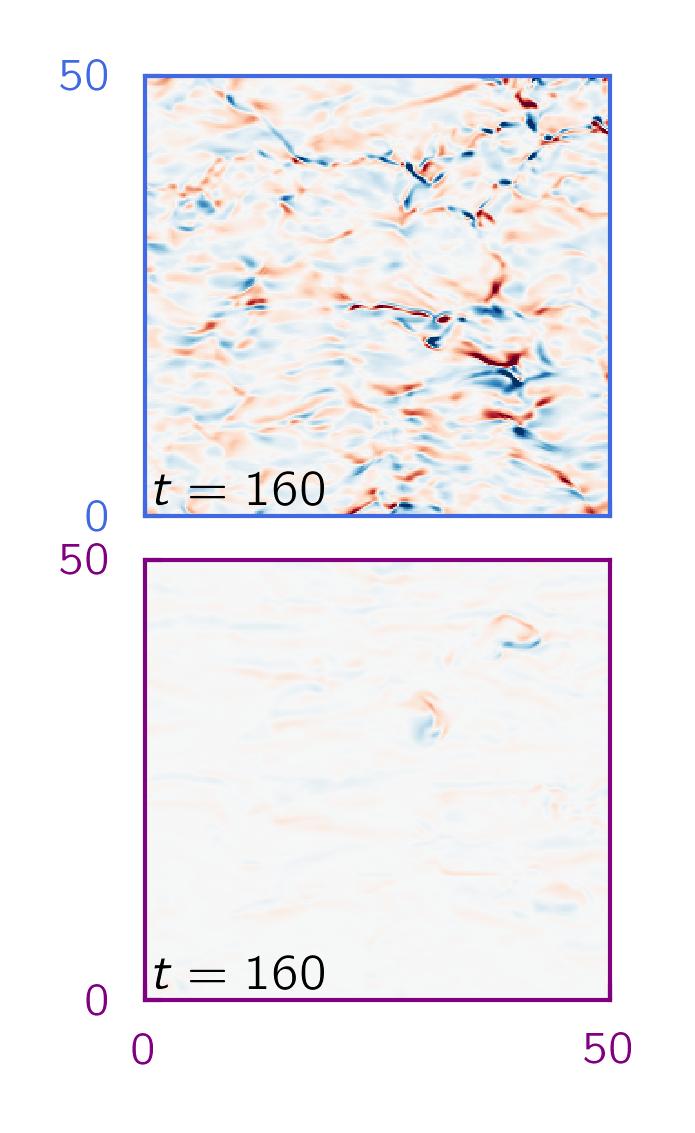

In [5]:
fig, axes = plt.subplots (2, 1, figsize=[1,2], sharex=True); ax = plt.gca()

depth = -7
zmean = ds.z.mean(dim=['x','y','t'])
NLAYER = zmean.sizes['zl']
LAYER = np.abs(zmean.values - depth).argmin()

vort2d = ds.omegaz.sel(zl=LAYER,t=160)
print('Average depth: %g' %(np.average(vort2d.z)))
ax = axes[1]
vort2d.plot(ax=ax, x='x', vmax=0.4, vmin=-0.4, cmap='RdBu_r', add_colorbar=False, xincrease=True, yincrease=True)
ax.set(xlabel=None, ylabel=None, title=None)
ax.set_xlim([0,50]); ax.set_xticks([-0,50])
ax.set_yticks([0,50]); ax.set_ylim([0,50])
c = 'purple'
ax.tick_params(axis='both', colors=c)
ax.tick_params(axis='both', colors=c)
ax.tick_params(axis='both', colors=c)
ax.spines['bottom'].set_color(c)
ax.spines['top'].set_color(c)
ax.spines['right'].set_color(c)
ax.spines['left'].set_color(c)
ax.annotate('$t=%g$' %160, (1,1), fontsize=6)

vort2d = ds.omegaz.sel(zl=NLAYER-1,t=160)
ax = axes[0]
vort2d.plot(ax=ax, x='x', vmax=0.4, vmin=-0.4, cmap='RdBu_r', add_colorbar=False, xincrease=True, yincrease=True)
ax.set(xlabel=None, ylabel=None, title=None)
ax.set_xlim([0,50]); ax.set_xticks([-0,50])
ax.set_yticks([0,50]); ax.set_ylim([0,50])
c = 'royalblue'
ax.tick_params(axis='both', colors=c)
ax.tick_params(axis='both', colors=c)
ax.tick_params(axis='both', colors=c)
ax.spines['bottom'].set_color(c)
ax.spines['top'].set_color(c)
ax.spines['right'].set_color(c)
ax.spines['left'].set_color(c)
ax.annotate('$t=%g$' %160, (1,1), fontsize=6)

# axes[0].get_xaxis().set_visible(False)
# axes[0].get_yaxis().set_visible(False)
# axes[1].get_xaxis().set_visible(False)
# axes[1].get_yaxis().set_visible(False)
plt.subplots_adjust(hspace=0.1)
plt.savefig('../figures/multilayer-diss/vort_top_' + ds.caselabel + '.tiff', bbox_inches='tight')

[Text(0.5, 0, ''), Text(0, 0.5, ''), Text(0.5, 1.0, '')]

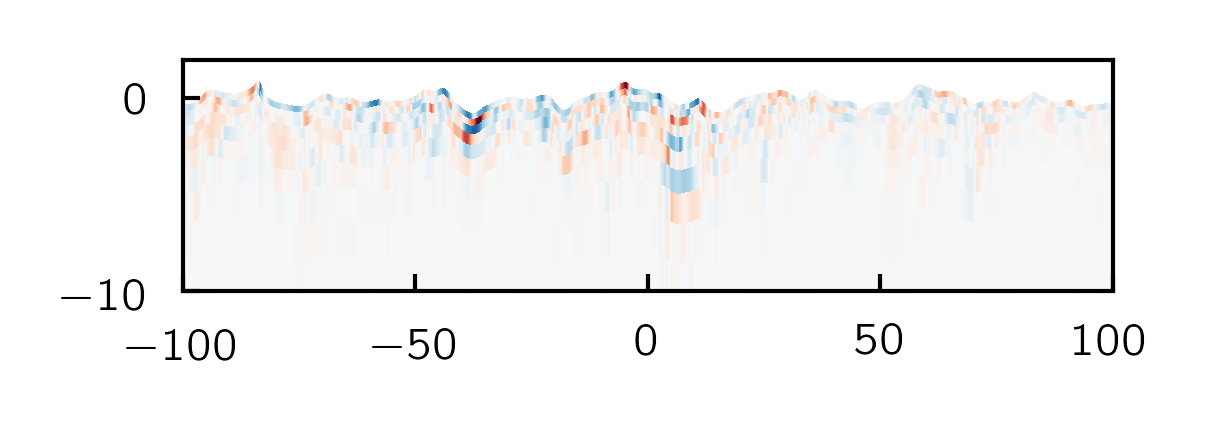

In [45]:
plt.figure(figsize=[2,0.5]); ax=plt.gca()
ds.omegax.sel(y=0,t=160,method='nearest').plot(x='x',y='z',vmax=0.5,vmin=-0.5,
                                               add_colorbar=False,cmap='RdBu_r')
ax.set_ylim([-10,2])
ax.set(xlabel=None, ylabel=None, title=None)

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, fftshift

def spectrum_1D (field):
    # Step 1: Generate or load a 2D field (for example, a synthetic field)
    # For demonstration, let's create a 2D Gaussian random field
    size = 1024

    # Step 2: Compute the 2D Fourier Transform
    ft_field = fft2(field)
    ft_field_shifted = fftshift(ft_field)  # Shift the zero frequency component to the center

    # Step 3: Compute the 2D Power Spectrum
    power_spectrum_2d = np.abs(ft_field_shifted)**2

    # Step 4: Compute the 1D Power Spectrum by radially averaging the 2D Power Spectrum
    # Create an array of the same shape as the field containing the radial distances
    y, x = np.indices((size, size))
    center = (size // 2, size // 2)
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)

    # Bin the power spectrum based on radial distance
    r = r.astype(int)
    tbin = np.bincount(r.ravel(), power_spectrum_2d.ravel())
    nr = np.bincount(r.ravel())
    radial_profile = tbin / nr
    
    return radial_profile


In [161]:
window = 'hann'
nfactor = 2
truncate = True
detrend = None
window_correction = True
Fux = xrft.isotropic_power_spectrum(ds.ux.sel(zl=29).drop(['z']), dim=('x','y'), window=window, nfactor=nfactor, 
                                   truncate=truncate, detrend=detrend, window_correction=window_correction)
Fuy = xrft.isotropic_power_spectrum(ds.uy.sel(zl=29).drop(['z']), dim=('x','y'), window=window, nfactor=nfactor, 
                                   truncate=truncate, detrend=detrend, window_correction=window_correction)
Fuz = xrft.isotropic_power_spectrum(ds.uz.sel(zl=29).drop(['z']), dim=('x','y'), window=window, nfactor=nfactor, 
                                   truncate=truncate, detrend=detrend, window_correction=window_correction)
Feta = xrft.isotropic_power_spectrum(ds.z.sel(zl=29).drop(['z']), dim=('x','y'), window=window, nfactor=nfactor, 
                                   truncate=truncate, detrend=detrend, window_correction=window_correction)

[0.08       0.0844898  0.08897959 0.09346939 0.09795918 0.10244898
 0.10693878 0.11142857 0.11591837 0.12040816 0.12489796 0.12938776
 0.13387755 0.13836735 0.14285714 0.14734694 0.15183673 0.15632653
 0.16081633 0.16530612 0.16979592 0.17428571 0.17877551 0.18326531
 0.1877551  0.1922449  0.19673469 0.20122449 0.20571429 0.21020408
 0.21469388 0.21918367 0.22367347 0.22816327 0.23265306 0.23714286
 0.24163265 0.24612245 0.25061224 0.25510204 0.25959184 0.26408163
 0.26857143 0.27306122 0.27755102 0.28204082 0.28653061 0.29102041
 0.2955102  0.3       ]


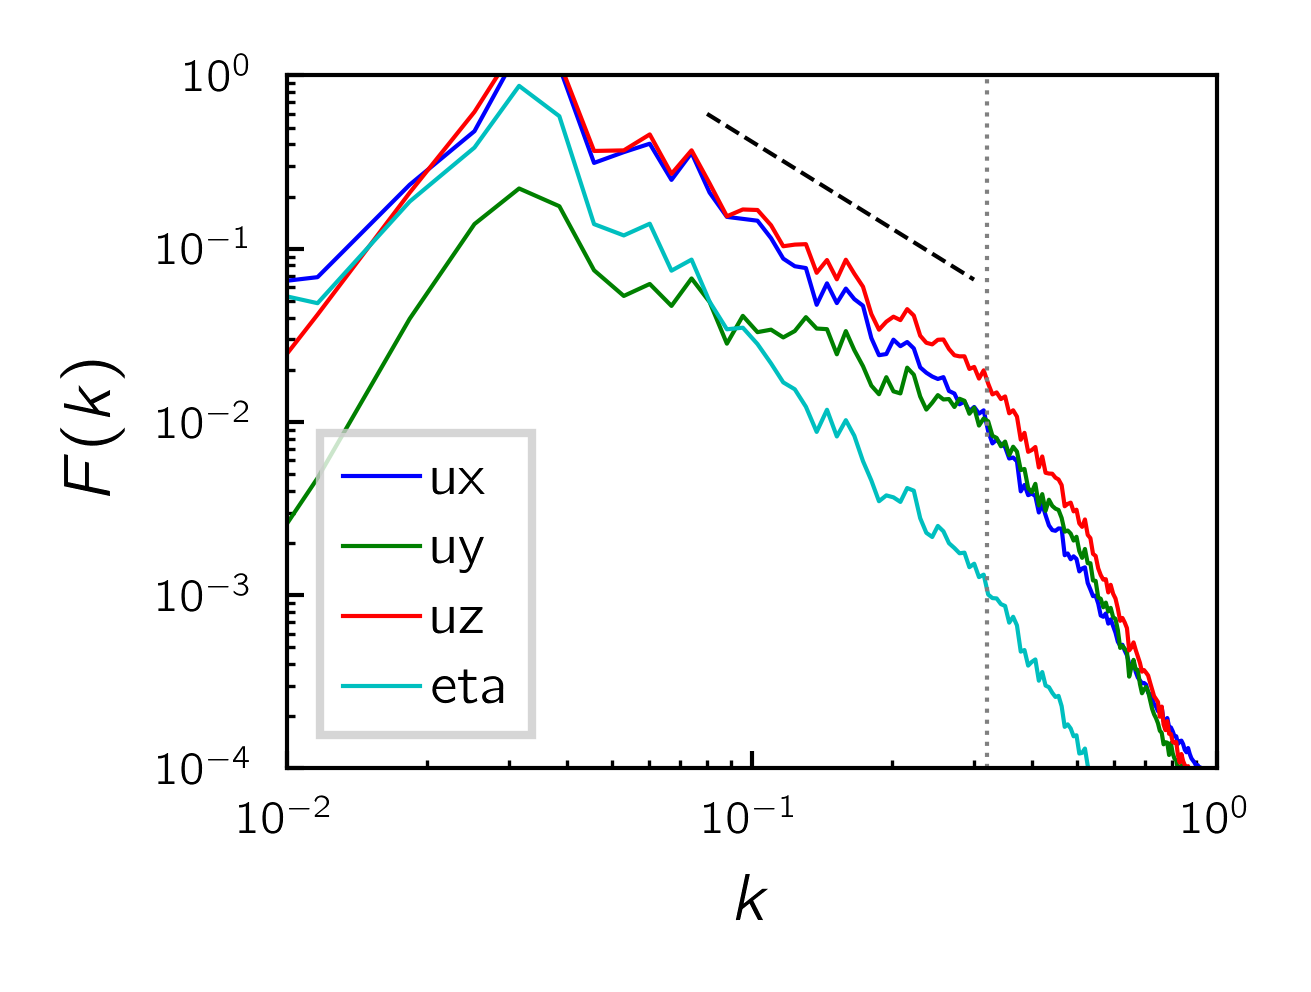

In [162]:
fig = plt.figure (figsize=[2,1.5])

Fux.plot(label='ux')
Fuy.plot(label='uy')
Fuz.plot(label='uz')
Feta.plot(label='eta')



plt.xlabel('$k$')
plt.ylabel('$F(k)$')
plt.yscale('log'); plt.xscale('log')
plt.ylim([10**(-4),1]); plt.xlim([10**(-2),1])
plt.axvline(x=(1024/16)/200, linestyle=':', c='gray')
plt.legend()